<h1>Data processing and visualization</h1>
<h2>The lab was done by <b>Nazarii Okhrimchuk</b>, <b>K10</b> member, 18 Variant</h2>

Versions on Modules:

<b>Pandas</b> - 2.1.4

<b>Matplotlib</b> - 3.8.2

<b>Python</b> - 3.11.7

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h3>1. Для періоду Р = номер_варіанту%12 +1 (місяць) побудувати лінійні графіки зміни
денної температурн, нічної температури, хмарності та сили вітру по днях. Графіки укласти на
один рисунок (але не в один графік).

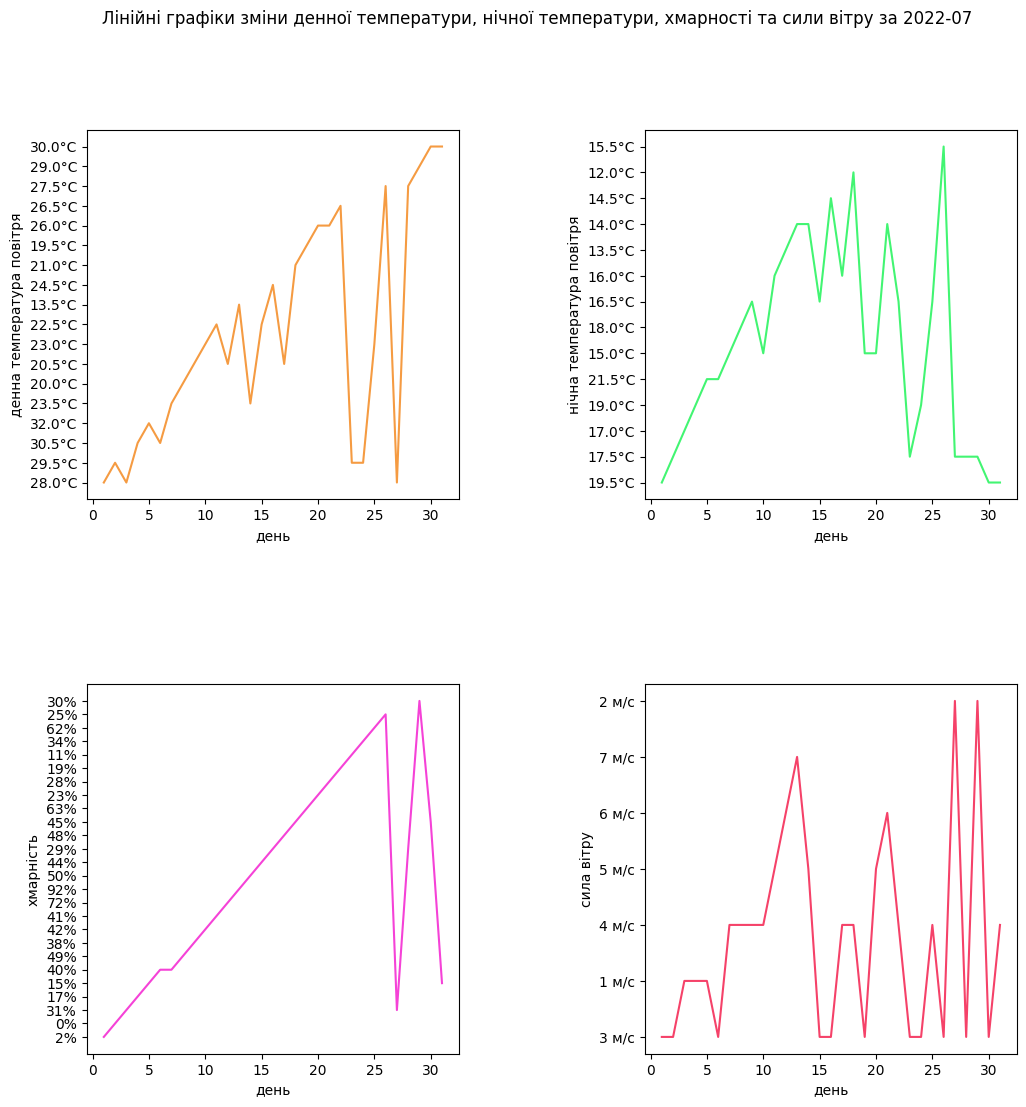

In [2]:
df = pd.read_csv('weather.csv')
df_p = df.loc[df['період'].str.contains('07')]

fig  = plt.figure(figsize=(12, 12))
fig.suptitle('Лінійні графіки зміни денної температури, нічної температури, хмарності та сили вітру за 2022-07')

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(df_p['день'], df_p['денна температура повітря'], color='#f59b42')
ax1.set_xlabel('день')
ax1.set_ylabel('денна температура повітря')

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(df_p['день'], df_p['нічна температура повітря'], color='#42f572')
ax2.set_xlabel('день')
ax2.set_ylabel('нічна температура повітря')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(df_p['день'], df_p['хмарність'], color='#f542d7')
ax3.set_xlabel('день')
ax3.set_ylabel('хмарність')

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(df_p['день'], df_p['сила вітру'], color='#f54269')
ax4.set_xlabel('день')
ax4.set_ylabel('сила вітру')

fig.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

<h3>2. Для періоду P побудувати бульбашковий (scatter) графік денної температури, діаметр “бульбашки” має залежати від кількості опадів. Якщо опадів не було, то підібрати якесь невелике значення, щоб була просто помітна точка.

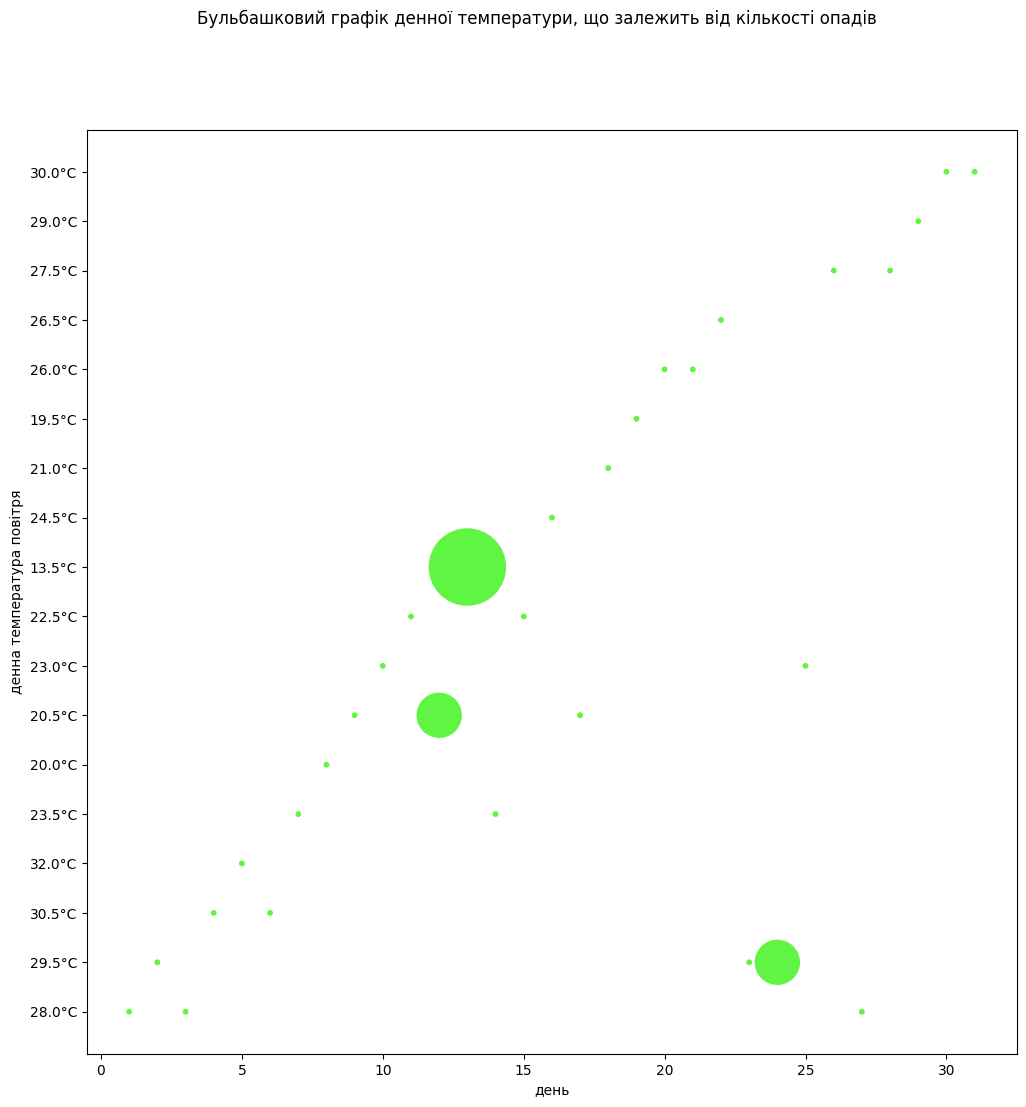

In [3]:
opady_data = df_p['опади'].replace('-', '0.01')
opady_data = opady_data.str.split()
opady_data = opady_data.str[0]
float_opady = opady_data.astype(float)

fig = plt.figure(figsize=(12,12))
fig.suptitle('Бульбашковий графік денної температури, що залежить від кількості опадів')
plt.xlabel('день')
plt.ylabel('денна температура повітря')
plt.scatter(df_p['день'], df_p['денна температура повітря'], s=float_opady*1000, color='#60f542')
plt.show()

<h3>3. Знайти середнє по місяцях відхилення нічної температури від денної.


In [4]:
pattern = r'(-*\d+.\d+)'
df_day_temp = df['денна температура повітря'].str.extract(pattern).astype(float)
df_night_temp = df['нічна температура повітря'].str.extract(pattern).astype(float)

data_month_deviant = pd.DataFrame()
data_month_deviant['місяць'] = pd.to_datetime(df['період']).dt.month.astype(int)
data_month_deviant['відхилення'] = abs(df_day_temp - df_night_temp).astype(float)

df2 = pd.DataFrame({'місяць':data_month_deviant['місяць'], 'відхилення':data_month_deviant['відхилення']})
df3 = df2.groupby('місяць').mean()
df3.rename(columns={'відхилення':'середнє відхилення'},inplace=True)

df3

,середнє відхилення
місяць,
1,2.887097
2,3.125000
3,4.854839
4,4.416667
5,7.451613
6,8.316667
7,8.693548
8,9.467742
9,5.416667


<h3>4.Знайти всі дні, коли фіксувалась найбільша розбіжність між денною та нічною температурами, та вивести для них усю наявну інформацію.


In [5]:
df['відхилення'] = data_month_deviant['відхилення']
df.nlargest(n=1, columns='відхилення', keep='all')

,день,хмарність,опади,денна температура повітря,нічна температура повітря,сила вітру,період,відхилення
267,26,9%,-,36.5°C,20.5°C,4 м/с,2022-08,16.0


<h3>5.У періоді P знайти 4 найбільш вітрених дні та вивести для них усю наявну інформацію.

In [6]:
wind_days = df_p['сила вітру'].str.extract(r'(\d)')
wind_days = wind_days[0].astype(int)
df.iloc[wind_days.nlargest(n=4)]

,день,хмарність,опади,денна температура повітря,нічна температура повітря,сила вітру,період,відхилення
7,8,88%,1 м.м.,14.5°C,7.5°C,1 м/с,2023-04,7.0
6,7,60%,-,11.5°C,4.5°C,2 м/с,2023-04,7.0
6,7,60%,-,11.5°C,4.5°C,2 м/с,2023-04,7.0
5,6,95%,1 м.м.,10.5°C,9.0°C,5 м/с,2023-04,1.5


<h3>6. Знайти скільки в кожному місяці було днів з опадами. Побудувати кругову діаграму.

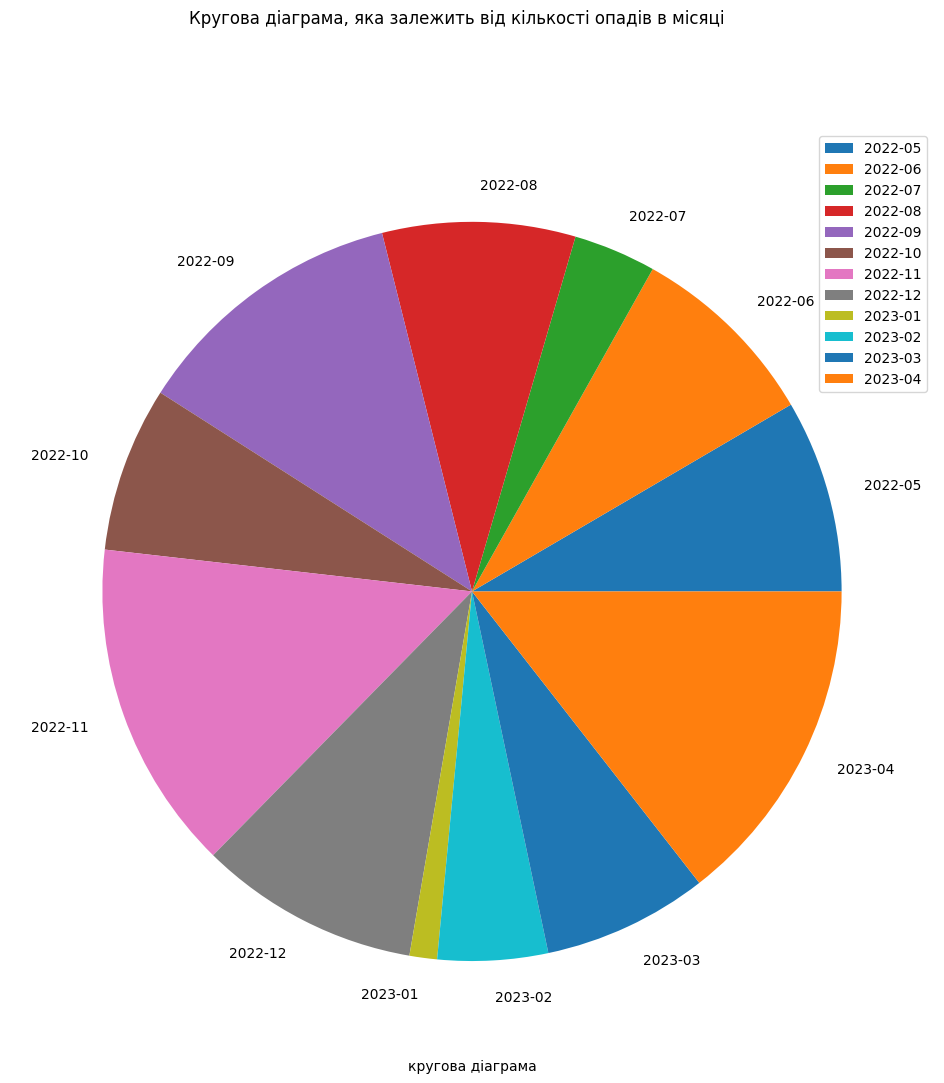

In [7]:
df_drop = df
df_drop = df_drop.replace('-', pd.NA)
df_drop.dropna(inplace=True)

result = pd.DataFrame({'опади':df_drop['опади'], 'місяць':df_drop['період']})
result_count = result.groupby('місяць').count()

result_count['опади'].plot.pie(figsize=(12,12), legend=True)
plt.suptitle('Кругова діаграма, яка залежить від кількості опадів в місяці')
plt.xlabel('кругова діаграма')
plt.ylabel('')
plt.show()

<h3>7. Якщо хмарність більша 70%, то вважатимемо день хмарним. Якщо хмарність менша 35%, вважатимемо день сонячним. У решті випадків вважаємо, що в той день була мінлива хмарність. Знайти кількість днів кожного типу на місяць та побудувати стовпчикову діаграму з накопиченням.


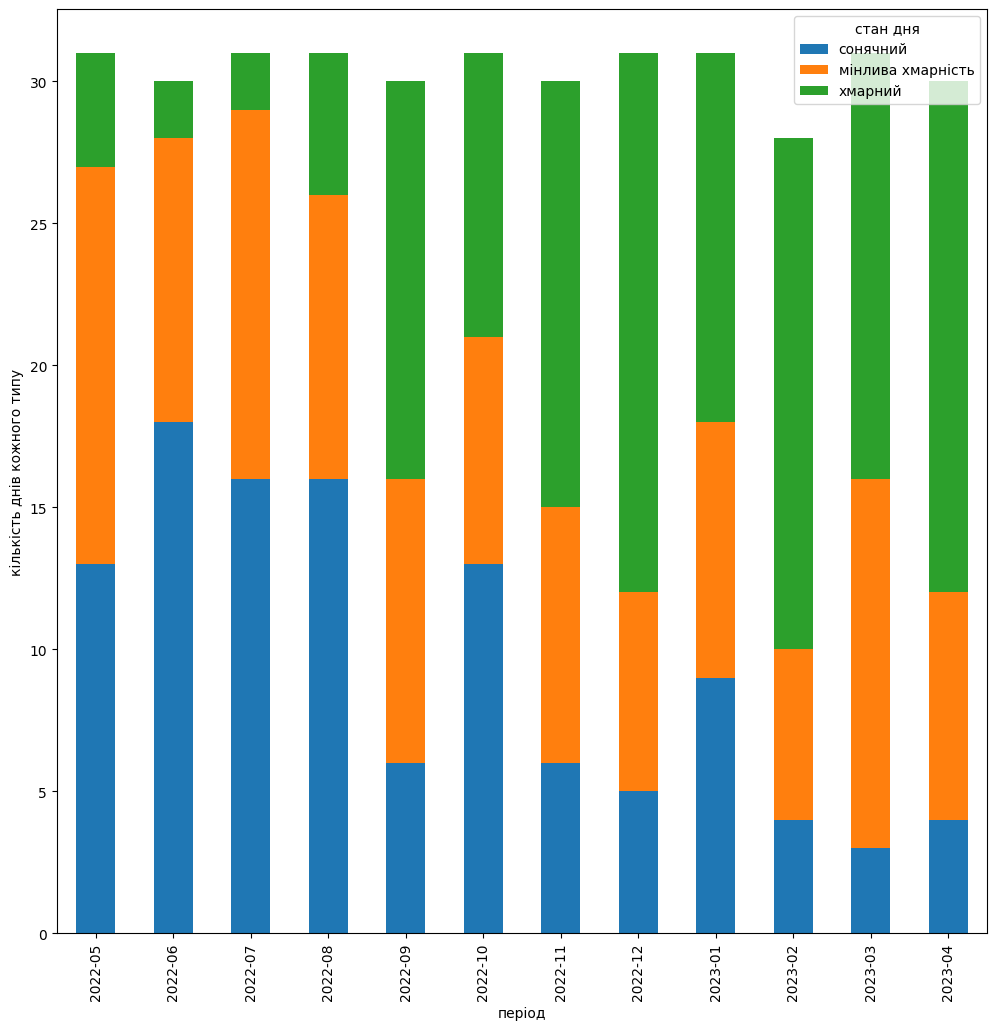

In [8]:
new_df = df.copy()
new_df['хмарність'] = new_df['хмарність'].str.extract(r'(\d+)%').astype(int)
bins = [-1, 34, 69, 100]

new_df['стан дня'] = pd.cut(new_df['хмарність'], bins, labels=['сонячний', 'мінлива хмарність', 'хмарний'])
new_df.groupby('період').agg({'стан дня':'count'})
new_df_pivot = new_df.pivot(index=['період', 'день'], columns='стан дня', values='стан дня')
weather = new_df_pivot.groupby('період').count()

weather.plot.bar(stacked=True, figsize=(12,12), legend=True)
plt.xlabel('період')
plt.ylabel('кількість днів кожного типу')
plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

<h3>8. Знайти всі місяці, в яких сонячних днів було більше, ніж днів з опадами.


In [9]:
df_weather = weather.copy()

status = pd.DataFrame({'сонячний': df_weather['сонячний'], 'опади': result_count['опади']})
status[status['сонячний'] > status['опади']]

,сонячний,опади
2022-05,13,7
2022-06,18,7
2022-07,16,3
2022-08,16,7
2022-10,13,6
2023-01,9,1


<h3>9. Побудувати гістограму відхилення нічної температури від денної.

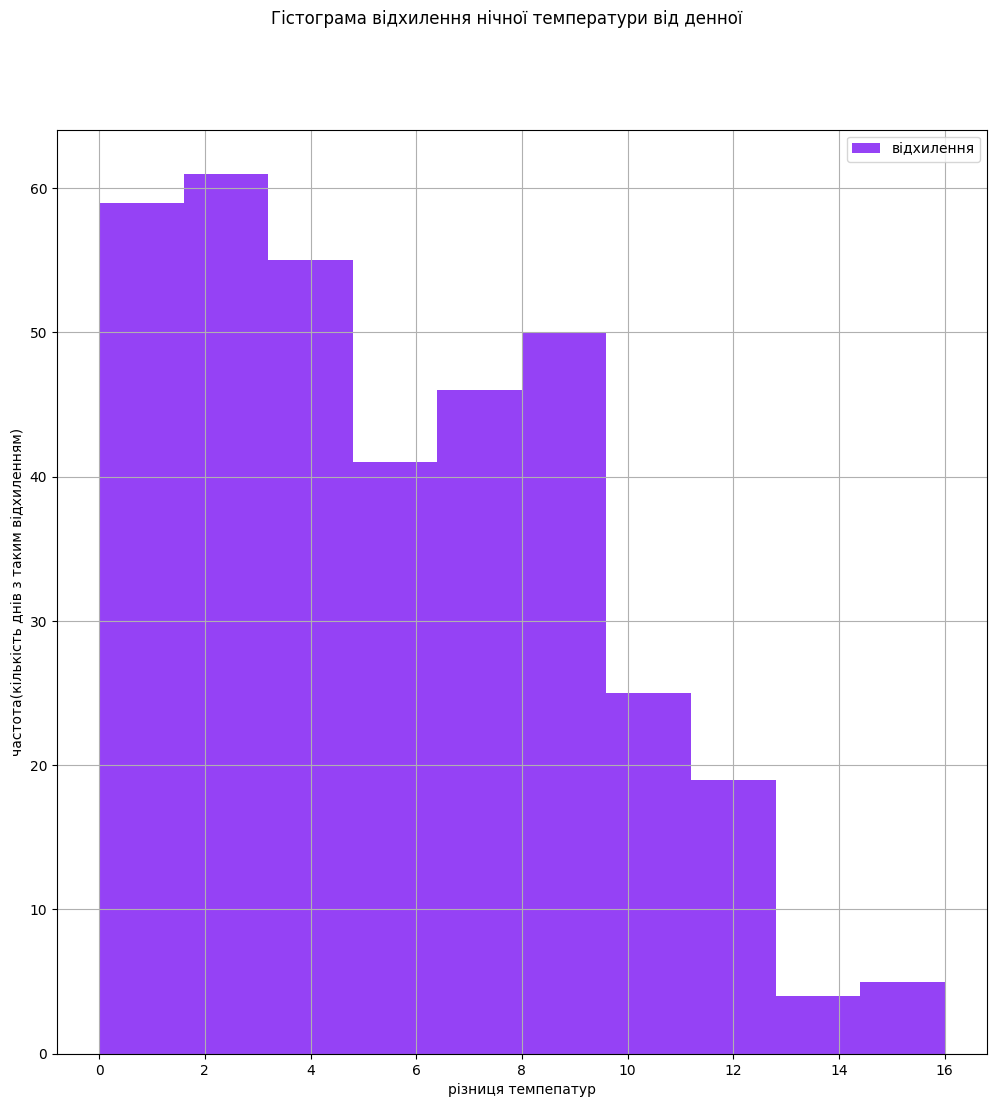

In [10]:
hist_df = df2.copy()
hist_df.drop(columns='місяць', inplace=True)
hist_df.set_index(df['день'], inplace=True)
hist_df.hist(legend=True, color='#9542f5', figsize=(12, 12))
plt.title('')
plt.suptitle('Гістограма відхилення нічної температури від денної')
plt.xlabel('різниця темпепатур')
plt.ylabel('частота(кількість днів з таким відхиленням)')
plt.show()